# Logistic Regression with Python and Scikit-Learn¶

In this project, I implement Logistic Regression with Python and Scikit-Learn. I build a classifier to predict whether or not it will rain tomorrow in Australia by training a binary classification model using Logistic Regression. I have used the Rain in Australia dataset downloaded from the Kaggle website for this project.

In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [400]:
import warnings

warnings.filterwarnings('ignore')

In [495]:
df = pd.read_csv('Downloads/weatherAUS.csv')

In [497]:
df = df.dropna()


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [498]:
# view dimensions of dataset

df.shape

(62050, 24)

In [499]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
7374,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0.0,No
7375,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0.0,No
7377,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0.0,No
7378,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0.0,No
7379,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0.0,No


In [500]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [501]:
df.drop(['RISK_MM'], axis=1, inplace=True)

In [406]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178266 entries, 0 to 178265
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           178266 non-null  object 
 1   Location       178266 non-null  object 
 2   MinTemp        175873 non-null  float64
 3   MaxTemp        176112 non-null  float64
 4   Rainfall       173891 non-null  float64
 5   Evaporation    90926 non-null   float64
 6   Sunshine       83237 non-null   float64
 7   WindGustDir    164996 non-null  object 
 8   WindGustSpeed  165091 non-null  float64
 9   WindDir9am     164628 non-null  object 
 10  WindDir3pm     171468 non-null  object 
 11  WindSpeed9am   175271 non-null  float64
 12  WindSpeed3pm   172712 non-null  float64
 13  Humidity9am    174800 non-null  float64
 14  Humidity3pm    171650 non-null  float64
 15  Pressure9am    158813 non-null  float64
 16  Pressure3pm    158826 non-null  float64
 17  Cloud9am       104389 non-nul

In [502]:

# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [503]:
# view the categorical variables

df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
7374,2009-01-01,Cobar,SSW,ENE,SW,No,No
7375,2009-01-02,Cobar,S,SSE,SSE,No,No
7377,2009-01-04,Cobar,NNE,NNE,NNW,No,No
7378,2009-01-05,Cobar,WNW,WNW,WSW,No,No
7379,2009-01-06,Cobar,WNW,NW,WNW,No,No


In [504]:

# check missing values in categorical variables

df[categorical].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [410]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

2014-11-15    49
2015-10-07    49
2019-06-16    49
2015-08-14    49
2018-12-02    49
              ..
2008-01-03     1
2008-01-27     1
2008-01-08     1
2007-11-05     1
2007-12-18     1
Name: Date, Length: 4107, dtype: int64
Canberra            4107
Sydney              4015
Darwin              3864
Melbourne           3864
Hobart              3864
Brisbane            3864
Adelaide            3863
Perth               3863
Wollongong          3711
GoldCoast           3711
Newcastle           3711
AliceSprings        3711
MountGinini         3711
Albury              3711
Launceston          3711
Ballarat            3711
Townsville          3711
Cairns              3711
Tuggeranong         3710
Penrith             3710
Albany              3710
MountGambier        3710
Bendigo             3702
Portland            3680
Dartmoor            3680
Watsonia            3680
NorfolkIsland       3680
Williamtown         3680
MelbourneAirport    3680
Richmond            3680
SydneyAirport       3680

In [505]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  4086  labels
Location  contains  26  labels
WindGustDir  contains  16  labels
WindDir9am  contains  16  labels
WindDir3pm  contains  16  labels
RainToday  contains  2  labels
RainTomorrow  contains  2  labels


In [506]:
df['Date'].dtypes

dtype('O')

In [507]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [508]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

7374    2009
7375    2009
7377    2009
7378    2009
7379    2009
Name: Year, dtype: int64

In [509]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

7374    1
7375    1
7377    1
7378    1
7379    1
Name: Month, dtype: int64

In [510]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

7374    1
7375    2
7377    4
7378    5
7379    6
Name: Day, dtype: int64

In [511]:
# again view the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62050 entries, 7374 to 173767
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           62050 non-null  datetime64[ns]
 1   Location       62050 non-null  object        
 2   MinTemp        62050 non-null  float64       
 3   MaxTemp        62050 non-null  float64       
 4   Rainfall       62050 non-null  float64       
 5   Evaporation    62050 non-null  float64       
 6   Sunshine       62050 non-null  float64       
 7   WindGustDir    62050 non-null  object        
 8   WindGustSpeed  62050 non-null  float64       
 9   WindDir9am     62050 non-null  object        
 10  WindDir3pm     62050 non-null  object        
 11  WindSpeed9am   62050 non-null  float64       
 12  WindSpeed3pm   62050 non-null  float64       
 13  Humidity9am    62050 non-null  float64       
 14  Humidity3pm    62050 non-null  float64       
 15  Pressure9am    

In [512]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [513]:
# preview the dataset again

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
7374,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1004.4,2.0,5.0,26.6,33.4,No,No,2009,1,1
7375,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.1,1.0,1.0,20.3,27.0,No,No,2009,1,2
7377,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1009.2,1.0,6.0,28.7,34.9,No,No,2009,1,4
7378,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1009.1,1.0,5.0,29.1,35.6,No,No,2009,1,5
7379,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,1007.4,1.0,6.0,33.6,37.6,No,No,2009,1,6


In [514]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [515]:
# check for missing values in categorical variables 

df[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [516]:
# print number of labels in Location variable

print('Location contains', len(df.Location.unique()), 'labels')

Location contains 26 labels


In [517]:
# check labels in location variable

df.Location.unique()

array(['Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Canberra', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Portland', 'Watsonia',
       'Brisbane', 'Cairns', 'Townsville', 'MountGambier', 'Nuriootpa',
       'Woomera', 'PerthAirport', 'Perth', 'Hobart', 'AliceSprings',
       'Darwin'], dtype=object)

In [518]:
# check frequency distribution of values in Location variable

df.Location.value_counts()

Darwin              3729
Perth               3648
MelbourneAirport    3581
PerthAirport        3561
SydneyAirport       3499
Watsonia            3315
Brisbane            3310
Mildura             2917
Melbourne           2610
Hobart              2550
NorfolkIsland       2379
MountGambier        2378
Cairns              2370
Townsville          2331
WaggaWagga          2330
Sydney              2281
AliceSprings        2142
Nuriootpa           1960
Moree               1876
Portland            1805
Sale                1678
Woomera             1655
CoffsHarbour        1380
Williamtown         1153
Canberra            1078
Cobar                534
Name: Location, dtype: int64

In [519]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df.Location, drop_first=True).head()

,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Darwin,Hobart,Melbourne,MelbourneAirport,Mildura,...,PerthAirport,Portland,Sale,Sydney,SydneyAirport,Townsville,WaggaWagga,Watsonia,Williamtown,Woomera
7374,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7375,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7377,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7378,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7379,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [520]:
# print number of labels in WindGustDir variable

print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 16 labels


In [521]:
# check labels in WindGustDir variable

df['WindGustDir'].unique()

array(['SSW', 'S', 'NNE', 'WNW', 'N', 'SE', 'ENE', 'NE', 'E', 'SW', 'W',
       'WSW', 'NNW', 'ESE', 'SSE', 'NW'], dtype=object)

In [522]:
# check frequency distribution of values in WindGustDir variable

df.WindGustDir.value_counts()

E      4827
N      4668
W      4638
SW     4575
SSW    4561
ENE    4277
WSW    4190
S      4080
SE     4040
ESE    3550
SSE    3538
WNW    3407
NE     3405
NW     2900
NNE    2806
NNW    2588
Name: WindGustDir, dtype: int64

In [523]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
7374,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7375,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7377,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7378,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7379,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [524]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    4277
ESE    3550
N      4668
NE     3405
NNE    2806
NNW    2588
NW     2900
S      4080
SE     4040
SSE    3538
SSW    4561
SW     4575
W      4638
WNW    3407
WSW    4190
NaN       0
dtype: int64

In [525]:
# print number of labels in WindDir9am variable

print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 16 labels


In [526]:
# check labels in WindDir9am variable

df['WindDir9am'].unique()

array(['ENE', 'SSE', 'NNE', 'WNW', 'NW', 'N', 'S', 'SE', 'NE', 'W', 'SSW',
       'E', 'NNW', 'ESE', 'WSW', 'SW'], dtype=object)

In [527]:
# check frequency distribution of values in WindDir9am variable

df['WindDir9am'].value_counts()

N      5477
E      4847
ENE    4233
W      4219
SSE    4095
SE     4079
S      3760
SW     3722
ESE    3660
NE     3654
NNE    3631
WNW    3446
WSW    3340
SSW    3321
NNW    3309
NW     3257
Name: WindDir9am, dtype: int64

In [528]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
7374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7375,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7377,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7378,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7379,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [529]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE    4233
ESE    3660
N      5477
NE     3654
NNE    3631
NNW    3309
NW     3257
S      3760
SE     4079
SSE    4095
SSW    3321
SW     3722
W      4219
WNW    3446
WSW    3340
NaN       0
dtype: int64

In [530]:
# print number of labels in WindDir3pm variable

print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 16 labels


In [531]:

# check labels in WindDir3pm variable

df['WindDir3pm'].unique()

array(['SW', 'SSE', 'NNW', 'WSW', 'WNW', 'S', 'ENE', 'N', 'SE', 'NNE',
       'NW', 'E', 'ESE', 'NE', 'SSW', 'W'], dtype=object)

In [532]:
# check frequency distribution of values in WindDir3pm variable

df['WindDir3pm'].value_counts()

SW     4553
S      4551
SE     4442
W      4319
WSW    4297
ENE    4207
E      4098
SSW    4015
N      3992
ESE    3927
NE     3666
SSE    3601
WNW    3586
NW     3081
NNW    3072
NNE    2643
Name: WindDir3pm, dtype: int64

In [533]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
7374,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7375,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7377,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7379,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [534]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE    4207
ESE    3927
N      3992
NE     3666
NNE    2643
NNW    3072
NW     3081
S      4551
SE     4442
SSE    3601
SSW    4015
SW     4553
W      4319
WNW    3586
WSW    4297
NaN       0
dtype: int64

In [535]:
# print number of labels in RainToday variable

print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 2 labels


In [536]:
# check labels in WindGustDir variable

df['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [537]:
# check frequency distribution of values in WindGustDir variable

df.RainToday.value_counts()

No     48570
Yes    13480
Name: RainToday, dtype: int64

In [538]:
# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
7374,0,0
7375,0,0
7377,0,0
7378,0,0
7379,0,0


In [539]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)


Yes    13480
NaN        0
dtype: int64

In [540]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [541]:

# view the numerical variables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
7374,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,2009,1,1
7375,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,2009,1,2
7377,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,2009,1,4
7378,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,2009,1,5
7379,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,2009,1,6


In [542]:
# check missing values in numerical variables

df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [543]:

# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  62050.0  62050.0   62050.0      62050.0   62050.0        62050.0   
mean      13.0     24.0       2.0          6.0       8.0           41.0   
std        6.0      7.0       7.0          4.0       4.0           13.0   
min       -7.0      4.0       0.0          0.0       0.0            9.0   
25%        8.0     19.0       0.0          3.0       5.0           31.0   
50%       13.0     24.0       0.0          5.0       9.0           39.0   
75%       18.0     30.0       1.0          7.0      11.0           48.0   
max       31.0     48.0     206.0        134.0      14.0          126.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count       62050.0       62050.0      62050.0      62050.0      62050.0   
mean           15.0          20.0         66.0         49.0       1017.0   
std             8.0           9.0         18.0         20.0          7.0   
min             2.0 

Text(0, 0.5, 'WindSpeed3pm')

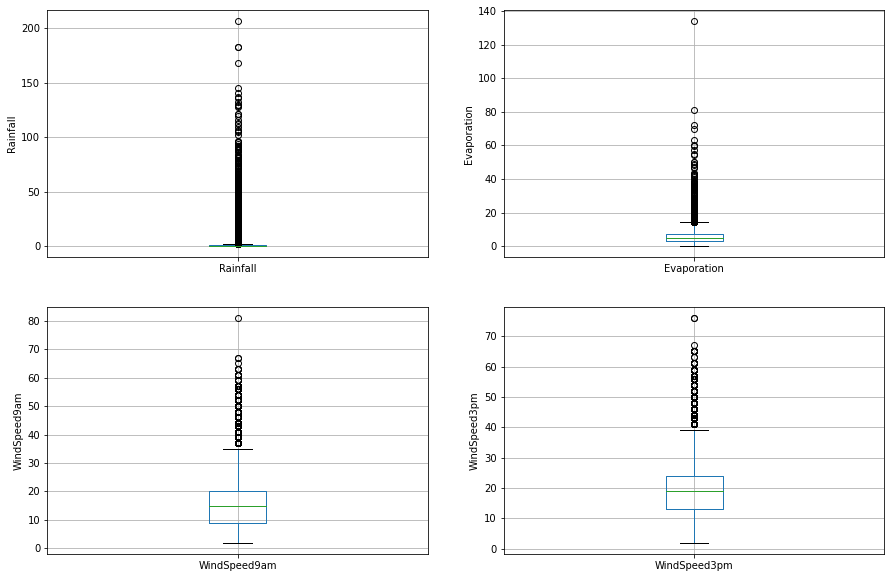

In [544]:

# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

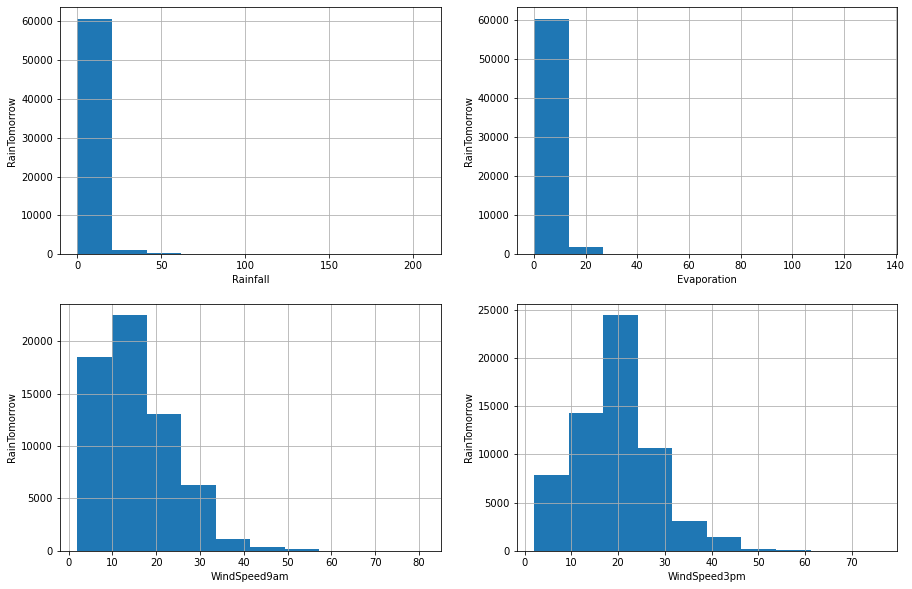

In [545]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [546]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -1.7999999999999998 or > 2.4


In [547]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.0 or > 21.200000000000003


In [548]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -24.0 or > 53.0


In [549]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [550]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [551]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((49640, 24), (12410, 24))

In [552]:
# check data types in X_train

X_train.dtypes



Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [553]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [554]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [555]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [556]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [557]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

In [558]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [559]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [560]:

# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [561]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

Location       0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
dtype: float64

In [562]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [563]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [564]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [565]:

# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [566]:
# check missing values in X_train

X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [567]:
# check missing values in X_test

X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [568]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [569]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [570]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [571]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [572]:

X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000
mean,13.350050,24.109587,0.662562,5.480105,7.739835,40.916962,15.462147,19.646676,65.815270,49.501894,1017.313987,1014.878842,4.220629,4.291680,18.060763,22.592558,2012.958461,6.514202,15.745226
std,6.361694,6.944706,1.173643,3.486820,3.738931,13.487352,8.352725,8.505319,18.364918,19.920500,6.942635,6.903195,2.799431,2.659697,6.534751,6.809164,3.209539,3.444266,8.772103
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,979.100000,978.900000,0.000000,0.000000,-0.700000,3.700000,2007.000000,1.000000,1.000000
25%,8.500000,18.600000,0.000000,2.800000,5.100000,31.000000,9.000000,13.000000,55.000000,36.000000,1012.700000,1010.100000,1.000000,2.000000,13.000000,17.300000,2010.000000,4.000000,8.000000
50%,13.000000,23.800000,0.000000,5.000000,8.700000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.600000,22.200000,2013.000000,7.000000,16.000000
75%,18.200000,29.500000,0.600000,7.400000,10.700000,48.000000,20.000000,24.000000,79.000000,63.000000,1022.000000,1019.600000,7.000000,7.000000,23.100000,27.700000,2015.000000,10.000000,23.000000
max,31.400000,48.100000,3.200000,21.800000,14.300000,126.000000,55.000000,57.000000,100.000000,100.000000,1041.100000,1040.100000,8.000000,9.000000,39.400000,46.100000,2020.000000,12.000000,31.000000


In [573]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [574]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
93710,Portland,WNW,SW,SW,Yes
86917,Mildura,ESE,SE,ESE,No
38834,Sydney,WSW,S,ENE,No
126422,Nuriootpa,SE,SSE,SE,Yes
108288,Cairns,ESE,S,ESE,Yes


In [575]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [576]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
93710,Portland,9.8,13.6,3.2,2.8,3.9,WNW,44.0,SW,SW,...,1010.2,8.0,8.0,11.4,11.9,0,1,2014,9,1
86917,Mildura,17.7,30.5,0.0,5.8,9.4,ESE,31.0,SE,ESE,...,1012.2,7.0,7.0,20.5,29.6,1,0,2012,2,21
38834,Sydney,12.8,18.8,0.0,4.0,6.2,WSW,33.0,S,ENE,...,1016.3,7.0,5.0,16.4,17.9,1,0,2013,9,15
126422,Nuriootpa,17.5,29.0,2.4,11.6,11.8,SE,39.0,SSE,SE,...,1014.5,6.0,2.0,19.3,28.1,0,1,2012,1,18
108288,Cairns,18.7,27.5,3.2,6.8,6.7,ESE,37.0,S,ESE,...,1014.5,7.0,1.0,20.6,26.3,0,1,2013,9,9


In [577]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [578]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
93710,9.8,13.6,3.2,2.8,3.9,44.0,13.0,22.0,85.0,82.0,...,0,0,0,0,0,0,1,0,0,0
86917,17.7,30.5,0.0,5.8,9.4,31.0,19.0,15.0,75.0,35.0,...,0,0,0,0,0,0,0,0,0,0
38834,12.8,18.8,0.0,4.0,6.2,33.0,6.0,17.0,74.0,66.0,...,0,0,0,0,0,0,0,0,0,0
126422,17.5,29.0,2.4,11.6,11.8,39.0,13.0,13.0,75.0,40.0,...,0,0,0,1,0,0,0,0,0,0
108288,18.7,27.5,3.2,6.8,6.7,37.0,22.0,26.0,85.0,52.0,...,0,0,0,0,0,0,0,0,0,0


In [579]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [580]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
78786,5.6,13.9,0.0,1.2,6.5,26.0,13.0,6.0,70.0,51.0,...,0,0,0,0,0,0,0,0,0,0
150133,18.5,24.8,0.0,11.2,0.5,37.0,11.0,9.0,48.0,87.0,...,0,0,0,0,0,0,0,0,1,0
96701,5.1,14.2,0.0,2.0,0.1,43.0,9.0,17.0,62.0,64.0,...,0,0,0,0,0,0,0,0,0,0
96160,15.2,32.5,0.0,8.0,11.5,39.0,15.0,26.0,58.0,46.0,...,0,0,0,0,0,1,0,0,0,0
159142,12.8,17.8,0.0,4.2,6.2,41.0,9.0,9.0,68.0,38.0,...,0,0,0,0,0,1,0,0,0,0


In [581]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,...,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000
mean,13.350050,24.109587,0.662562,5.480105,7.739835,40.916962,15.462147,19.646676,65.815270,49.501894,...,0.050342,0.049940,0.073268,0.071797,0.058259,0.063940,0.074275,0.070447,0.057836,0.069601
std,6.361694,6.944706,1.173643,3.486820,3.738931,13.487352,8.352725,8.505319,18.364918,19.920500,...,0.218653,0.217822,0.260578,0.258154,0.234236,0.244649,0.262220,0.255902,0.233436,0.254476
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.500000,18.600000,0.000000,2.800000,5.100000,31.000000,9.000000,13.000000,55.000000,36.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,23.800000,0.000000,5.000000,8.700000,39.000000,15.000000,19.000000,67.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.200000,29.500000,0.600000,7.400000,10.700000,48.000000,20.000000,24.000000,79.000000,63.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.400000,48.100000,3.200000,21.800000,14.300000,126.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [582]:
cols = X_train.columns

In [583]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [584]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [585]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [586]:

X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,...,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000
mean,0.526248,0.454763,0.207051,0.251381,0.541247,0.272795,0.254003,0.320849,0.658153,0.495019,...,0.050342,0.049940,0.073268,0.071797,0.058259,0.063940,0.074275,0.070447,0.057836,0.069601
std,0.166974,0.157834,0.366763,0.159946,0.261464,0.115277,0.157599,0.154642,0.183649,0.199205,...,0.218653,0.217822,0.260578,0.258154,0.234236,0.244649,0.262220,0.255902,0.233436,0.254476
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.398950,0.329545,0.000000,0.128440,0.356643,0.188034,0.132075,0.200000,0.550000,0.360000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.517060,0.447727,0.000000,0.229358,0.608392,0.256410,0.245283,0.309091,0.670000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.653543,0.577273,0.187500,0.339450,0.748252,0.333333,0.339623,0.400000,0.790000,0.630000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [587]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [588]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'Yes', 'Yes', ..., 'Yes', 'No', 'No'], dtype=object)

In [589]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.98181672, 0.09892489, 0.44563301, ..., 0.39246587, 0.985023  ,
       0.96554903])

In [590]:

logreg.predict_proba(X_test)[:,1]

array([0.01818328, 0.90107511, 0.55436699, ..., 0.60753413, 0.014977  ,
       0.03445097])

In [591]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8578


In [592]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [593]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8583


In [594]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8583
Test set score: 0.8578


In [596]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [597]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8582
Test set score: 0.8583


In [598]:
# fit the Logsitic Regression model with C=0.01

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [599]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8485
Test set score: 0.8525


# Comparing it with Null Accuracy 

In [600]:
y_test.value_counts()

No     9697
Yes    2713
Name: RainTomorrow, dtype: int64

In [601]:
# check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


In [602]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[9186  511]
 [1254 1459]]

True Positives(TP) =  9186

True Negatives(TN) =  1459

False Positives(FP) =  511

False Negatives(FN) =  1254


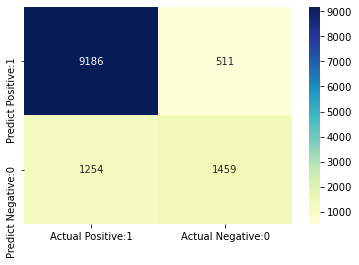

In [603]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Classification Report

In [605]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [606]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8578


In [607]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1422


# Precision

In [608]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9473


# Recall 

In [610]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8799


# True Positive Rate

In [611]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8799


# False Positive Rate

In [612]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2594


# Sensitivity

In [613]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7406


In [614]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.98181672, 0.01818328],
       [0.09892489, 0.90107511],
       [0.44563301, 0.55436699],
       [0.96250673, 0.03749327],
       [0.96665609, 0.03334391],
       [0.91182859, 0.08817141],
       [0.76853445, 0.23146555],
       [0.99254064, 0.00745936],
       [0.78463275, 0.21536725],
       [0.71922522, 0.28077478]])

In [615]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.981817,0.018183
1,0.098925,0.901075
2,0.445633,0.554367
3,0.962507,0.037493
4,0.966656,0.033344
5,0.911829,0.088171
6,0.768534,0.231466
7,0.992541,0.007459
8,0.784633,0.215367
9,0.719225,0.280775


In [616]:

# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(X_test)[0:10, 1]

array([0.01818328, 0.90107511, 0.55436699, 0.03749327, 0.03334391,
       0.08817141, 0.23146555, 0.00745936, 0.21536725, 0.28077478])

In [617]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

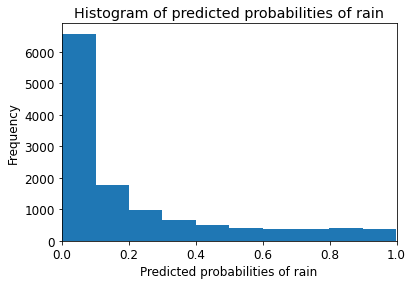

In [618]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

In [619]:

from sklearn.preprocessing import binarize

for i in range(1,5):
    
    cm1=0
    
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, i/10)
    
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[6325 3372]
 [ 212 2501]] 

 with 8826 correct predictions,  

 3372 Type I errors( False Positives),  

 212 Type II errors( False Negatives),  

 Accuracy score:  0.7112006446414182 

 Sensitivity:  0.9218577220788795 

 Specificity:  0.6522635866762916 



With 0.2 threshold the Confusion Matrix is  

 [[7794 1903]
 [ 524 2189]] 

 with 9983 correct predictions,  

 1903 Type I errors( False Positives),  

 524 Type II errors( False Negatives),  

 Accuracy score:  0.8044319097502014 

 Sensitivity:  0.8068558791006266 

 Specificity:  0.8037537382695679 



With 0.3 threshold the Confusion Matrix is  

 [[8505 1192]
 [ 786 1927]] 

 with 10432 correct predictions,  

 1192 Type I errors( False Positives),  

 786 Type II errors( False Negatives),  

 Accuracy score:  0.8406124093473005 

 Sensitivity:  0.7102838186509399 

 Specificity:  0.8770753841394245 



With 0.4 threshold the Confusion Matrix is  

 [[8914  783]
 [1032 1681]] 


# ROC Curve

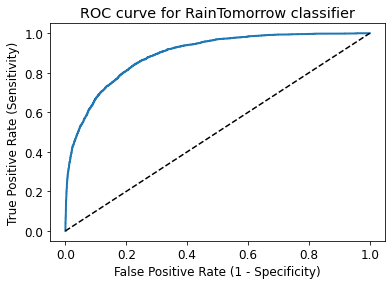

In [620]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [621]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8937


ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.